In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('ANZ_transaction.xlsx')
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


## Data Cleaning

In [3]:
print('Number of rows in dataset is {}'.format(df.shape[0]))
print('Number of columns in dataset is {}'.format(df.shape[1]))

Number of rows in dataset is 12043
Number of columns in dataset is 23


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Let's check what is the percentage of null values(if any)
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

card_present_flag    0.359213
merchant_id          0.359213
merchant_suburb      0.359213
merchant_state       0.359213
merchant_long_lat    0.359213
bpay_biller_code     0.926513
merchant_code        0.926679
dtype: float64

In [6]:
df['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

#### We will delete currency column too as it has only one value and showing zero variance

In [7]:
# We will delete all attributes which are of no use to us and not playing any role in EDA
cols_to_be_deleted = ['bpay_biller_code','currency','merchant_id','merchant_code','transaction_id']
df.drop(cols_to_be_deleted,axis=1,inplace=True)
df.head()

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,Australia,CUS-2487424745,153.44 -28.06,debit


In [8]:
df.dtypes

status                       object
card_present_flag           float64
account                      object
long_lat                     object
txn_description              object
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [9]:
# Making a separate column for extraction time or transaction time
ext_time = df['extraction'].str.split('T',expand=True)
df['transaction_time'] = ext_time[1].str.split('.',expand=True)[0]
df.head()

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,country,customer_id,merchant_long_lat,movement,transaction_time
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15


In [10]:
# Now we will delete extraction column as we had make separate column for transaction date and transaction time
df.drop(['extraction'],axis=1,inplace=True)
df.head()

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,country,customer_id,merchant_long_lat,movement,transaction_time
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,14.19,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,6.42,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15


In [11]:
# Let's make a separate column for which tells us at which hour of the day,transaction was done(remember as time is in 24-hour
#format, so 1-12 means 1am-12am and 13-24 means 1pm-12pm)
df['transaction_hour'] = pd.to_datetime(df['transaction_time']).dt.hour

## Exploratory Data Analysis

In [12]:
# Let's make a new column for transaction day and transaction month to get a better insight
df['transaction_day'] = df['date'].dt.day_name()
df['transaction_month'] = df['date'].dt.month_name()
df.head()

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,country,customer_id,merchant_long_lat,movement,transaction_time,transaction_hour,transaction_day,transaction_month
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,1,Wednesday,August
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,14.19,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,1,Wednesday,August
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,6.42,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,1,Wednesday,August
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,1,Wednesday,August
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,1,Wednesday,August


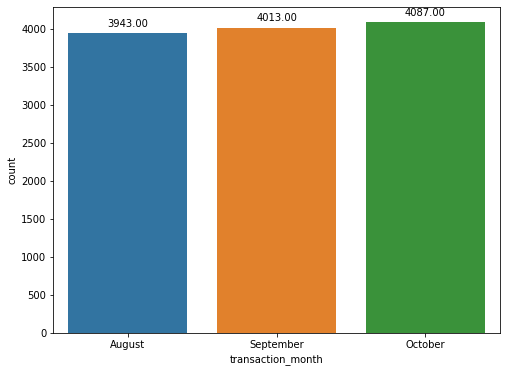

In [13]:
# We have data of transaction for 91 days, let's find out what was number of transaction for each month
plt.figure(figsize=(8,6))
splot = sns.countplot(df['transaction_month'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Observations
#### 1.We have 3943 transactions in August,4013 in September and 4087 in October
#### 2.We can say that 4000 transactions are made per month on an average

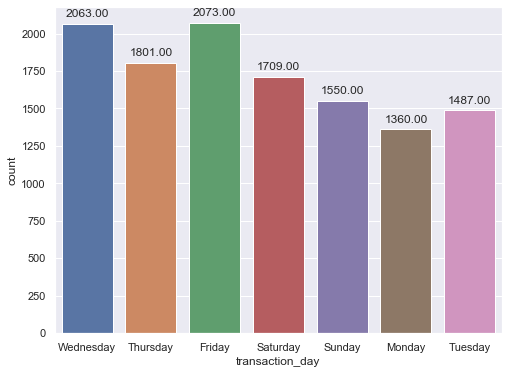

In [14]:
# Let's find out the transaction for each day
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
splot = sns.countplot(df['transaction_day'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Observations
#### 1.Highest number of transactions are made on Friday and Wednesday and lowest number of tranactions are made on Monday.

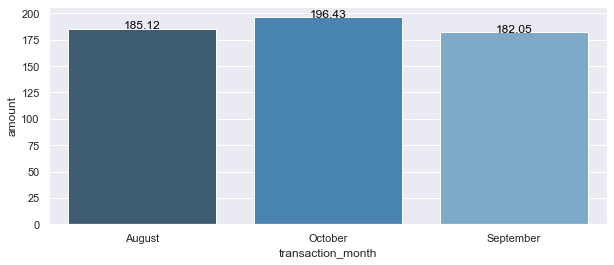

In [15]:
plt.figure(figsize=(10,4))
groupedvalues=df.groupby('transaction_month').mean().reset_index()
g =sns.barplot(x='transaction_month',y='amount',data=groupedvalues, palette='Blues_d')

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.show()

### 1.Highest average amount of transaction is done in october.
### 2.Lowest average amount of transaction is done in september.

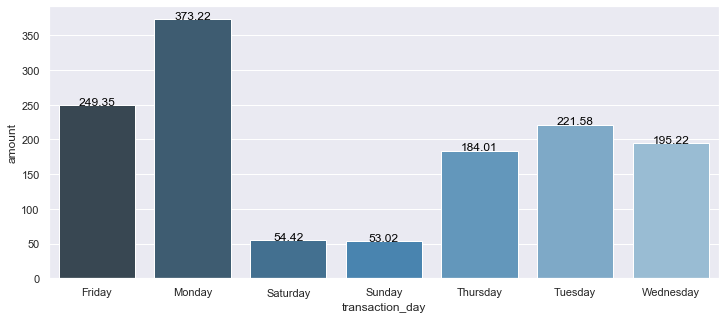

In [16]:
plt.figure(figsize=(12,5))
groupedvalues=df.groupby('transaction_day').mean().reset_index()
g =sns.barplot(x='transaction_day',y='amount',data=groupedvalues, palette='Blues_d')

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.show()

### Observations
#### 1.Average amount of transaction is lowest on weekends i.e., Saturday and Sunday.
#### 2.Average amount of transaction is highest on Monday.

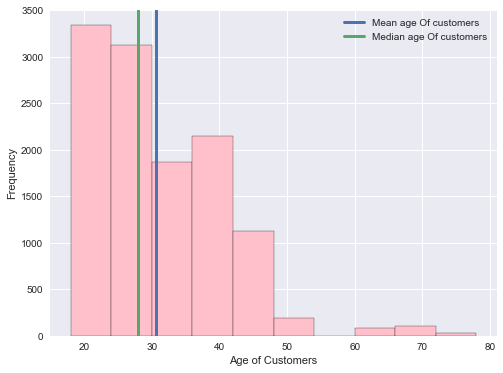

In [17]:
# Let's check what is the age distribution i.e.,People of which age group occurs frequently in our dataset
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.hist(df['age'], edgecolor='black', color='pink')
plt.xlabel('Age of Customers')
plt.ylabel('Frequency')
plt.axvline(df['age'].mean(), label='Mean age Of customers', linewidth=3)
plt.axvline(df['age'].median(), label='Median age Of customers', linewidth=3, color='g')
plt.legend()
plt.show()

### Around 50% of the customers of ANZ bank falls between age group between 20-30 having mean and median age around 30. Knowing this can help Organisation to make better Offer and strategies for younger customers.

In [18]:
# Let's set index to date column hence we can understand how transaction varies on a daily and monthly basis
date_df = df.set_index('date')
date_df.head()

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,gender,age,merchant_suburb,merchant_state,amount,country,customer_id,merchant_long_lat,movement,transaction_time,transaction_hour,transaction_day,transaction_month
date,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,F,26,Ashmore,QLD,16.25,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,1,Wednesday,August
2018-08-01,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,F,26,Sydney,NSW,14.19,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,1,Wednesday,August
2018-08-01,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,M,38,Sydney,NSW,6.42,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,1,Wednesday,August
2018-08-01,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,F,40,Buderim,QLD,40.90,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,1,Wednesday,August
2018-08-01,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,F,26,Mermaid Beach,QLD,3.25,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,1,Wednesday,August


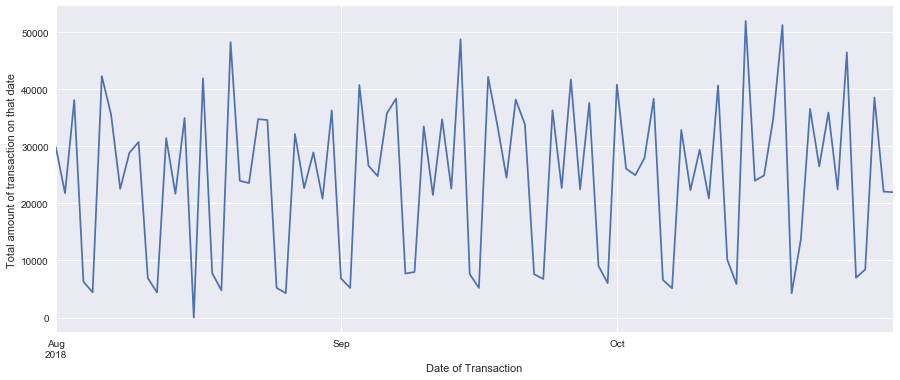

In [19]:
# let's find out  total transaction amount for each day
plt.figure(figsize=(15,6))
date_df.resample('D')['amount'].sum().plot()
plt.xlabel('Date of Transaction')
plt.ylabel('Total amount of transaction on that date')
plt.show()

#### We can clearly see that Total amount of transaction on each day follows a pereodic trend i.e., total amount transacted on each date is low at a certain period and high at a certain period for every month

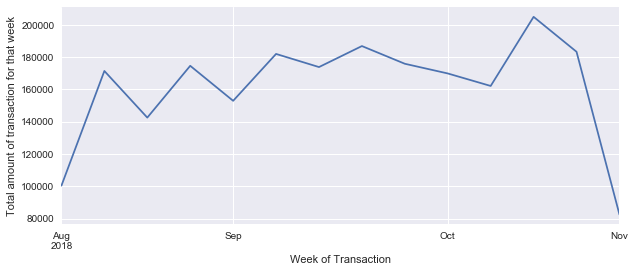

In [20]:
# let's find out total transaction amount for each week
plt.figure(figsize=(10,4))
plt.tight_layout()
date_df.resample('W')['amount'].sum().plot()
plt.xlabel('Week of Transaction')
plt.ylabel('Total amount of transaction for that week')
plt.show()

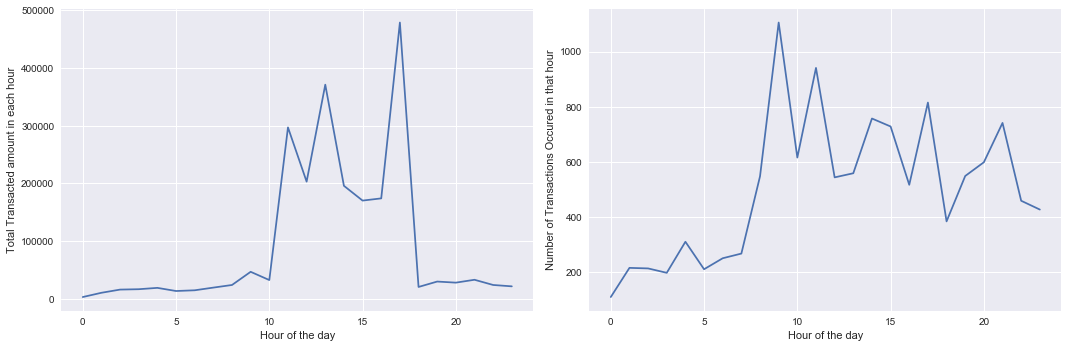

In [21]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
groupedvalues = df.groupby('transaction_hour').sum().reset_index()
sns.lineplot(x='transaction_hour', y='amount',data=groupedvalues,markers=True)
plt.xlabel('Hour of the day')
plt.ylabel('Total Transacted amount in each hour')

fig.add_subplot(1,2,2)
sns.lineplot(df['transaction_hour'].value_counts().index, df['transaction_hour'].value_counts())
plt.ylabel('Number of Transactions Occured in that hour')
plt.xlabel('Hour of the day')

plt.tight_layout()
plt.show()

## Obseravtions
### 1.Total Amount of transaction is highest at 1pm and 5pm.
### 2.Most transactions are made at morning time i.e., at 9am and 11am.

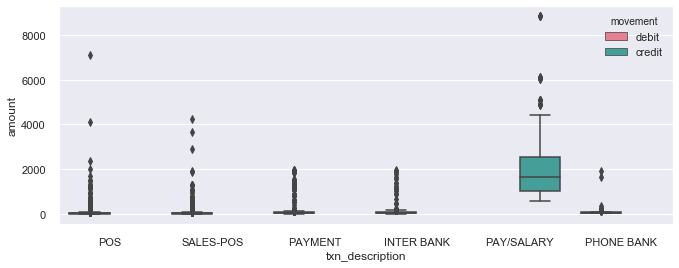

In [22]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.boxplot(df['txn_description'], df['amount'], palette='husl', hue=df['movement'])
plt.show()

## Observations
### 1.Highest transaction amount was around 9000 and was for Pay/Salary
### 2.Highest transaction amount was done with a Credit Card

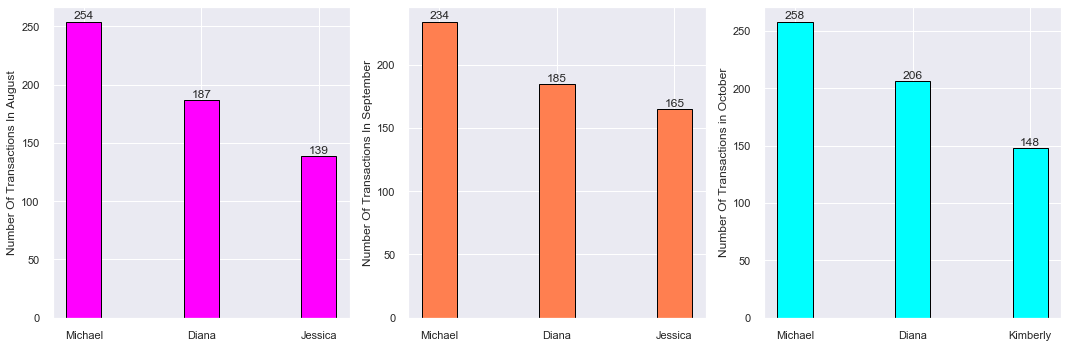

In [23]:
aug = pd.DataFrame(date_df['2018-08']['first_name'].value_counts().head(3))
sep = pd.DataFrame(date_df['2018-09']['first_name'].value_counts().head(3))
oct = pd.DataFrame(date_df['2018-10']['first_name'].value_counts().head(3))

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.bar(aug.index, aug['first_name'], edgecolor='black', width = 0.3, color='magenta')
ax1.set_ylabel('Number Of Transactions In August')
for rect in ax1.patches:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va = 'bottom')

ax2 = fig.add_subplot(1,3,2)
ax2.bar(sep.index, sep['first_name'], edgecolor='black', width = 0.3, color='coral')
ax2.set_ylabel('Number Of Transactions In September')
for rect in ax2.patches:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va='bottom')


ax3 = fig.add_subplot(1,3,3)
ax3.bar(oct.index, oct['first_name'], edgecolor='black', width = 0.3, color='cyan')
ax3.set_ylabel('Number Of Transactions in October')
for rect in ax3.patches:
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va='bottom')


plt.tight_layout()
plt.show()

## Observations
#### 1.In August, Michael,Diana and jessica made highest number of transactions.
#### 2.In September, Michael,Diana and jessica made highest number of transactions.
#### 3.In October,Michael,Diana and Kimberly made highest number of tranactions
#### 4. Michael made the most number of transactions in all three months

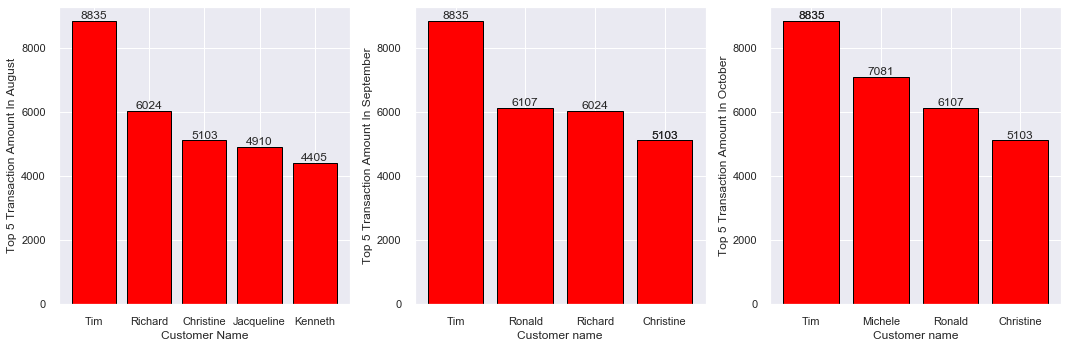

In [24]:
# Let's find out what are the top 5 transactions for each month and Who were the customers
aug_top_5 = date_df['2018-08'].sort_values(by='amount', ascending=False).head(5)
sept_top_5 = date_df['2018-09'].sort_values(by='amount', ascending=False).head(5)
oct_top_5 = date_df['2018-10'].sort_values(by='amount', ascending=False).head(5)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.bar(aug_top_5['first_name'], aug_top_5['amount'], edgecolor='black', color='red')
ax1.set_xlabel('Customer Name')
ax1.set_ylabel('Top 5 Transaction Amount In August')
for rectangle in ax1.patches:
    height = rectangle.get_height()
    ax1.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va = 'bottom')

ax2 = fig.add_subplot(1,3,2)  
ax2.bar(sept_top_5['first_name'], sept_top_5['amount'], edgecolor='black', color='red')
ax2.set_xlabel('Customer name')
ax2.set_ylabel('Top 5 Transaction Amount In September')
for rectangle in ax2.patches:
    height = rectangle.get_height()
    ax2.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va = 'bottom')
    
ax3 = fig.add_subplot(1,3,3)
ax3.bar(oct_top_5['first_name'], oct_top_5['amount'], edgecolor='black', color='red')
ax3.set_xlabel('Customer name')
ax3.set_ylabel('Top 5 Transaction Amount In October')
for rectangle in ax3.patches:
    height = rectangle.get_height()
    ax3.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va = 'bottom')

plt.tight_layout()
plt.show()

## Above plot shows highest transaction amounts For each month
### Observations
#### 1.Tim made highest transaction of amount 8835 in all the months.

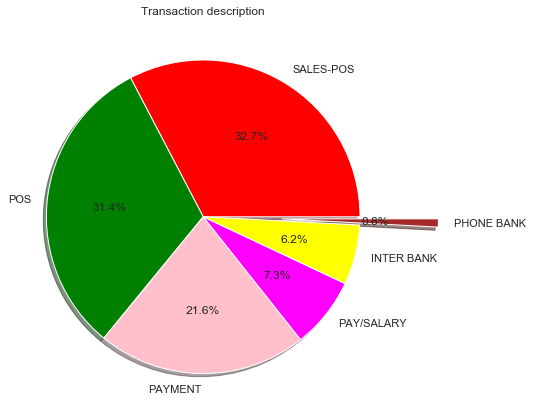

In [25]:
# Let's see what is the transaction type that people do mmore frequently
plt.figure(figsize=(8,6))
colors = ['red','green','pink','magenta','yellow','brown']
plt.pie(df['txn_description'].value_counts(), labels=df['txn_description'].value_counts().index,
        shadow=True,colors=colors,autopct='%1.1f%%', explode=(0,0,0,0,0,0.5))
plt.title('Transaction description')
plt.tight_layout()
plt.axis()
plt.show()

### Observations
#### 1.Most number of transactions taking place are of Type Sales
#### 2.Lowest number of transactions are made by Phone

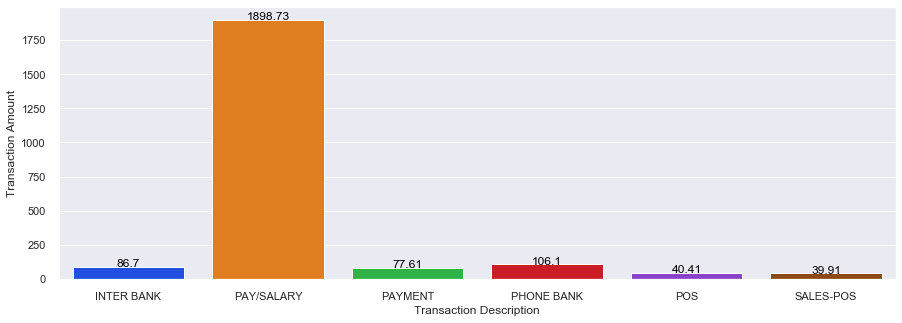

In [26]:
plt.figure(figsize=(15,5))
groupedvalues=df.groupby('txn_description').mean().reset_index()
g =sns.barplot(x='txn_description',y='amount',data=groupedvalues, palette='bright')
g.set_xlabel("Transaction Description")
g.set_ylabel("Transaction Amount")

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.show()

## Observations
### 1.Transactions in which more amount is transacted are of Salary type transactions
### 2.Transactions in which less amount is transacted are of Sales-Pos type transactions

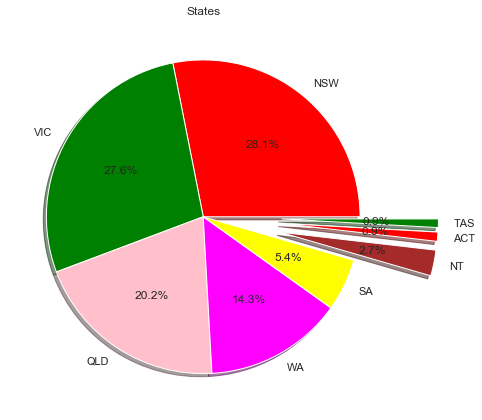

In [27]:
plt.figure(figsize=(8,6))
colors = ['red','green','pink','magenta','yellow','brown']
#slices = df['txn_description'].value_counts()
#labels = df['txn_description'].value_counts().index
plt.pie(df['merchant_state'].value_counts(), labels=df['merchant_state'].value_counts().index,
        shadow=True,colors=colors,autopct='%1.1f%%', explode=(0,0,0,0,0,0.5,0.5,0.5))
plt.title('States')
plt.tight_layout()
plt.axis()
plt.show()

## Observations
### 1.Highest number of transactions were made from state NSW.
### 2.Lowest number of transactions were made from state TAS.

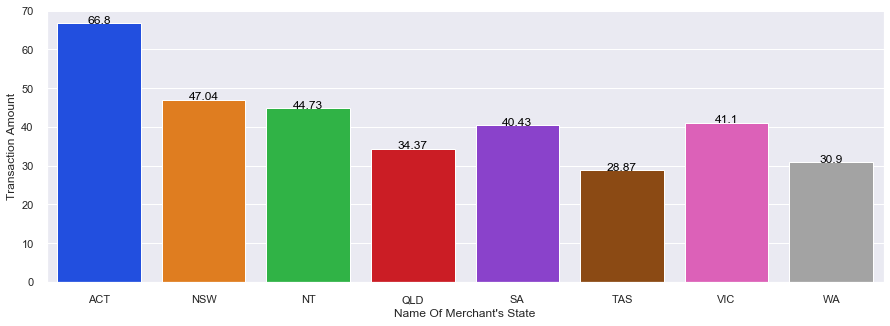

In [28]:
plt.figure(figsize=(15,5))
grouped_values = df.groupby('merchant_state').mean().reset_index()
g = sns.barplot(x='merchant_state',y='amount',data=grouped_values,palette='bright')
g.set_xlabel("Name Of Merchant's State")
g.set_ylabel("Transaction Amount")
for index,row in grouped_values.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha='center')
plt.show()

## Observations
### 1.State ACT has highest average transaction amount.
### 2.State TAS has lowest average transaction amount.

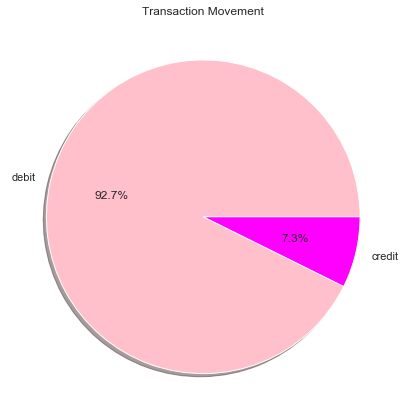

In [29]:
# Let's check which type of transaction movement people use more frequently
plt.figure(figsize=(8,6))
colors = ['pink','magenta']
#slices = df['txn_description'].value_counts()
#labels = df['txn_description'].value_counts().index
plt.pie(df['movement'].value_counts(), labels=df['movement'].value_counts().index,
        shadow=True,colors=colors,autopct='%1.1f%%')
plt.title('Transaction Movement')
plt.tight_layout()
plt.axis()
plt.show()

## Observations
### 1.92.7% Of people use debit card for transactions
### 2.7.3% of people use credit card for transactions

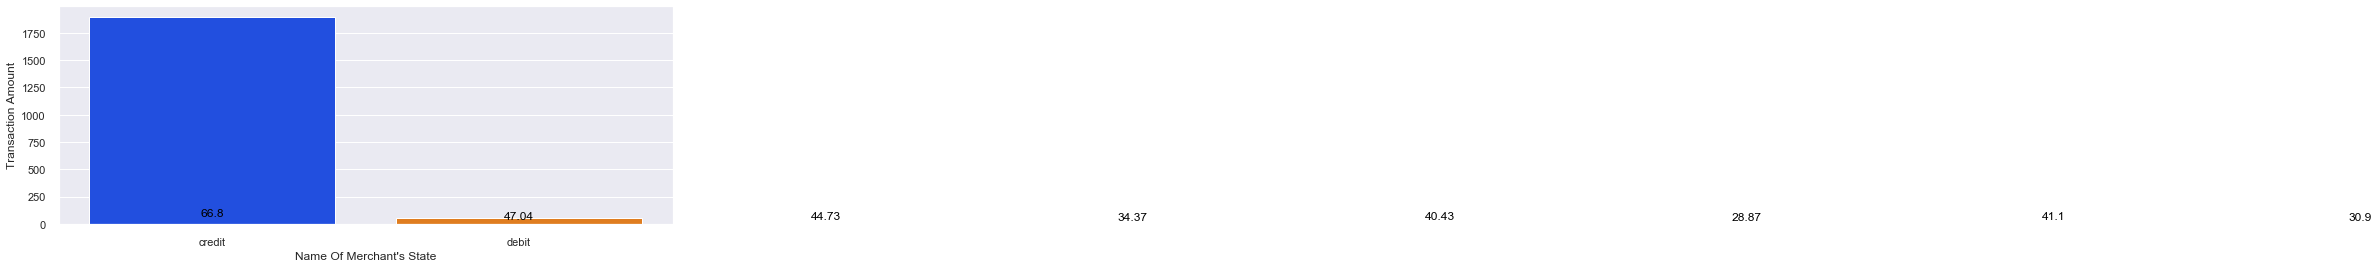

In [30]:
grouped2_values = df.groupby('movement').mean().reset_index()
g = sns.barplot(x='movement',y='amount',data=grouped2_values,palette='bright', errwidth=0.5)
g.set_xlabel("Name Of Merchant's State")
g.set_ylabel("Transaction Amount")
for index,row in grouped_values.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha='center')
plt.show()

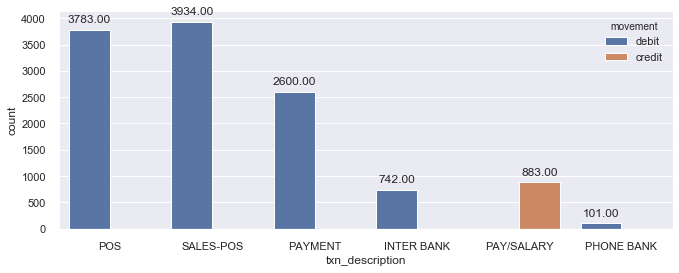

In [31]:
# Let's find out transaction of various types follow which kind of movement(credit or debit)
splot = sns.countplot(df['txn_description'], hue=df['movement'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Observations
#### 1.Credit Card is used only for Paying/Salary type of transactions and Pay/Salary type of transactions are done only by credit card
#### 2.Except salary,every other type of transaction is done by debit card.